# Cyclistic Bike Share | Case Study

### About :
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.<br>
<br>
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customerswho purchase annual memberships are Cyclistic members.<br>
<br>
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.<br>
<br>
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

__Data Source Used :__
Divvy Data - The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure)

### Business Task :
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

In [14]:
# Reading data into a dataframe
df = pd.read_csv("E:/College/Tech/ML/Case Study 1/bikedata.csv",parse_dates=['started_at','ended_at'])

In [15]:
df.head(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:00,2021-03-16 08:36:00,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.92,-87.70,41.92,-87.69,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:00,2021-03-28 01:36:00,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.92,-87.70,41.91,-87.72,casual
2,846D87A15682A284,classic_bike,2021-11-03 21:17:00,2021-11-03 21:33:00,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.84,-87.64,41.83,-87.65,casual
3,994D05AA75A168F2,classic_bike,2021-11-03 13:26:00,2021-11-03 13:55:00,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.97,-87.66,41.95,-87.65,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:00,2021-03-21 09:27:00,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01,-87.67,42.05,-87.68,casual
5,CEBA8516FD17F8D8,classic_bike,2021-03-20 11:08:00,2021-03-20 11:29:00,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01,-87.67,42.05,-87.68,casual
6,297268586B79588B,classic_bike,2021-03-20 14:10:00,2021-03-20 14:22:00,State St & Kinzie St,13050,Lake Shore Dr & North Blvd,LF-005,41.89,-87.63,41.91,-87.63,member
7,F39301858B6077DD,electric_bike,2021-03-23 07:56:00,2021-03-23 08:05:00,Shore Dr & 55th St,TA1308000009,Ellis Ave & 60th St,KA1503000014,41.80,-87.58,41.79,-87.60,member
8,D297F199D875BABE,electric_bike,2021-03-31 15:31:00,2021-03-31 15:35:00,Clinton St & Lake St,13021,Franklin St & Jackson Blvd,TA1305000025,41.89,-87.64,41.88,-87.64,member
9,36B877141175ED7E,classic_bike,2021-11-03 17:37:00,2021-11-03 17:52:00,Michigan Ave & Lake St,TA1305000011,Racine Ave & Washington Blvd,654,41.89,-87.62,41.88,-87.66,member


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             228496 non-null  object        
 1   rideable_type       228496 non-null  object        
 2   started_at          228496 non-null  datetime64[ns]
 3   ended_at            228496 non-null  datetime64[ns]
 4   start_station_name  213648 non-null  object        
 5   start_station_id    213648 non-null  object        
 6   end_station_name    211769 non-null  object        
 7   end_station_id      211769 non-null  object        
 8   start_lat           228496 non-null  float64       
 9   start_lng           228496 non-null  float64       
 10  end_lat             228329 non-null  float64       
 11  end_lng             228329 non-null  float64       
 12  member_casual       228496 non-null  object        
dtypes: datetime64[ns](2), float64

In [18]:
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,228496,228496,228496,228496,213648,213648,211769,211769,228496.00,228496.00,228329.00,228329.00,228496
unique,228496,3,35029,35046,673,673,673,673,NaN,NaN,NaN,NaN,2
top,3B11E4BDFE9AE71D,classic_bike,2021-03-21 13:49:00,2021-03-21 16:22:00,Lake Shore Dr & Monroe St,13300,Lake Shore Dr & Monroe St,13300,NaN,NaN,NaN,NaN,member
freq,1,152545,52,50,2453,2453,2380,2380,NaN,NaN,NaN,NaN,144463
first,NaN,NaN,2021-01-03 00:01:00,2021-01-03 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-03 23:59:00,2021-12-03 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.90,-87.64,41.90,-87.65,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.03,0.04,0.03,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.65,-87.78,41.64,-88.07,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.88,-87.66,41.88,-87.66,NaN


In [20]:
df["time_diff"] = df['ended_at'] - df['started_at']
df["time_diff"] = df["time_diff"]/np.timedelta64(1,'m')
df["weekday"] = df["started_at"].dt.weekday
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,weekday
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:00,2021-03-16 08:36:00,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.92,-87.70,41.92,-87.69,casual,4.00,1
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:00,2021-03-28 01:36:00,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.92,-87.70,41.91,-87.72,casual,10.00,6
2,846D87A15682A284,classic_bike,2021-11-03 21:17:00,2021-11-03 21:33:00,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.84,-87.64,41.83,-87.65,casual,16.00,2
3,994D05AA75A168F2,classic_bike,2021-11-03 13:26:00,2021-11-03 13:55:00,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.97,-87.66,41.95,-87.65,casual,29.00,2
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:00,2021-03-21 09:27:00,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01,-87.67,42.05,-87.68,casual,18.00,6


#### Groupby Function :


In [21]:
df.groupby("start_station_name")["ride_id"].count().sort_values()

start_station_name
Commercial Ave & 100th St           1
N Hampden Ct & W Diversey Ave       1
N Damen Ave & W Wabansia St         1
N Carpenter St & W Lake St          1
Ashland Ave & Garfield Blvd         1
                                 ... 
Wells St & Elm St                1660
Millennium Park                  1757
Clark St & Elm St                1935
Streeter Dr & Grand Ave          2074
Lake Shore Dr & Monroe St        2453
Name: ride_id, Length: 673, dtype: int64

In [22]:
df.groupby("end_station_name")["ride_id"].count().sort_values()

end_station_name
Bradley Park                    1
Halsted St & 96th St            1
Halsted St & 69th St            1
Halsted St & 59th St            1
Marshfield Ave & 59th St        1
                             ... 
Michigan Ave & Oak St        1714
Millennium Park              1869
Clark St & Elm St            1924
Streeter Dr & Grand Ave      2039
Lake Shore Dr & Monroe St    2380
Name: ride_id, Length: 673, dtype: int64

In [23]:
df.groupby("rideable_type")["ride_id"].count().sort_values()

rideable_type
docked_bike       15657
electric_bike     60294
classic_bike     152545
Name: ride_id, dtype: int64

In [24]:
df.groupby("member_casual")["ride_id"].count().sort_values()

member_casual
casual     84033
member    144463
Name: ride_id, dtype: int64

In [25]:
df.groupby("start_station_name")["time_diff"].mean().sort_values()

start_station_name
Halsted St & 73rd St                 -38133.60
Central Park Blvd & 5th Ave           -8085.17
Lawndale Ave & 111th St               -7703.94
Malcolm X College Vaccination Site    -4582.42
Bernard St & Elston Ave               -3278.79
                                        ...   
Perry Ave & 69th St                    5421.38
Ashland Ave & 63rd St                  8953.20
Michigan Ave & 71st St                12090.14
East End Ave & 87th St                20285.40
Ashland Ave & 66th St                 21635.50
Name: time_diff, Length: 673, dtype: float64

In [26]:
df.groupby("rideable_type")["time_diff"].mean().sort_values()

rideable_type
electric_bike   -25.84
classic_bike     10.46
docked_bike     146.58
Name: time_diff, dtype: float64

In [27]:
df.groupby("member_casual")["time_diff"].mean().sort_values()

member_casual
member   -5.42
casual   37.06
Name: time_diff, dtype: float64

#### Droppping unwanted features :

In [28]:
df.drop(['ride_id','start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'],axis=1,inplace=True)
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,time_diff,weekday
0,classic_bike,2021-03-16 08:32:00,2021-03-16 08:36:00,Humboldt Blvd & Armitage Ave,Stave St & Armitage Ave,casual,4.00,1
1,classic_bike,2021-03-28 01:26:00,2021-03-28 01:36:00,Humboldt Blvd & Armitage Ave,Central Park Ave & Bloomingdale Ave,casual,10.00,6
2,classic_bike,2021-11-03 21:17:00,2021-11-03 21:33:00,Shields Ave & 28th Pl,Halsted St & 35th St,casual,16.00,2
3,classic_bike,2021-11-03 13:26:00,2021-11-03 13:55:00,Winthrop Ave & Lawrence Ave,Broadway & Sheridan Rd,casual,29.00,2
4,classic_bike,2021-03-21 09:09:00,2021-03-21 09:27:00,Glenwood Ave & Touhy Ave,Chicago Ave & Sheridan Rd,casual,18.00,6


#### Treating Missing Values


In [30]:
df.isnull().sum()

rideable_type             0
started_at                0
ended_at                  0
start_station_name    14848
end_station_name      16727
member_casual             0
time_diff                 0
weekday                   0
dtype: int64

In [31]:
df['start_station_name'] = df['start_station_name'].replace(np.nan,"Missing")
df['end_station_name'] = df['end_station_name'].replace(np.nan,"Missing")
df.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
time_diff             0
weekday               0
dtype: int64

In [32]:
df.describe()

,time_diff,weekday
count,228496.00,228496.00
mean,10.21,3.31
std,4830.33,2.05
min,-383035.00,0.00
25%,7.00,2.00
50%,12.00,4.00
75%,23.00,5.00
max,351462.00,6.00


### Data Visualisation :
#### Univariate data exploration

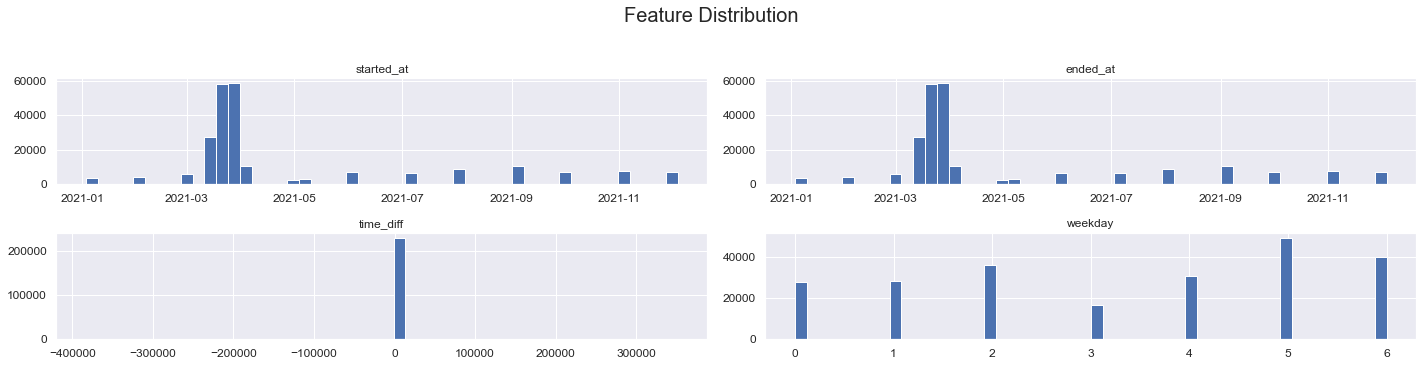

In [33]:
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

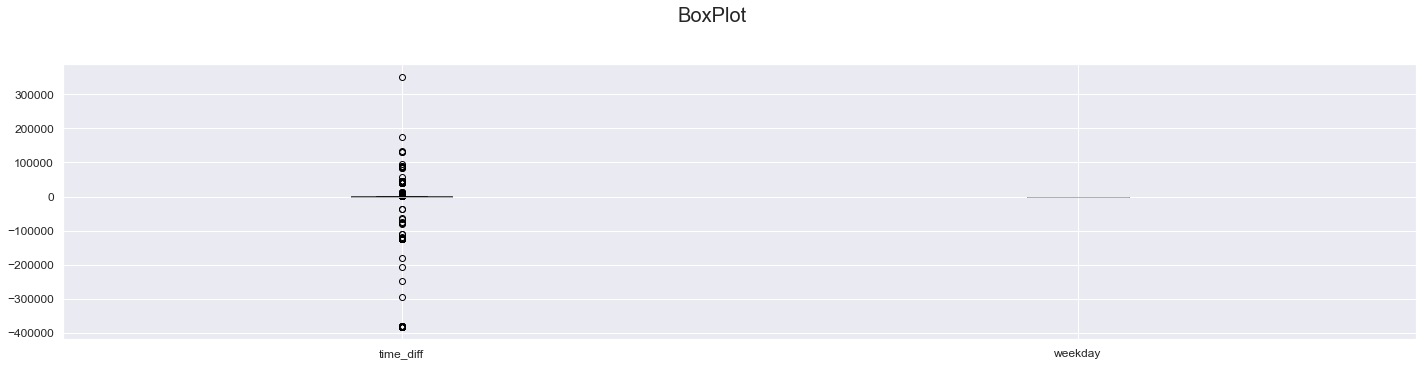

In [34]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

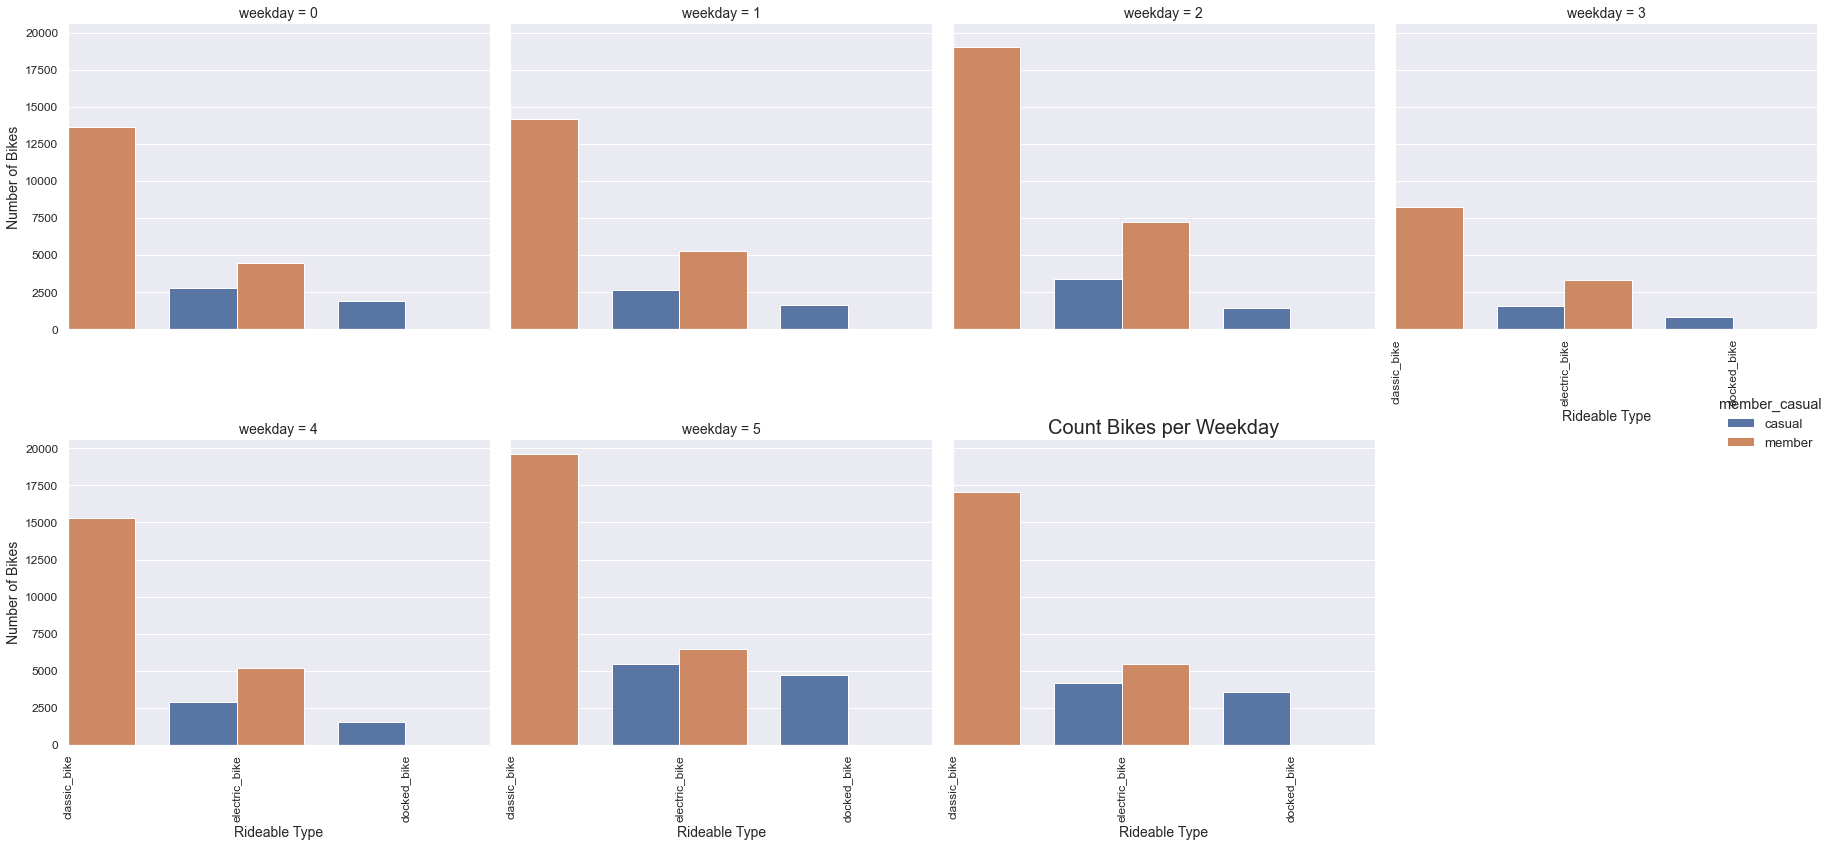

In [35]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='rideable_type', hue='member_casual', col = 'weekday', col_wrap=4,
            kind='count', data=df,
            height = 6, aspect = 1)

g.set_xlabels("Rideable Type")
g.set_ylabels("Number of Bikes")
plt.title("Count Bikes per Weekday", size=20)
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

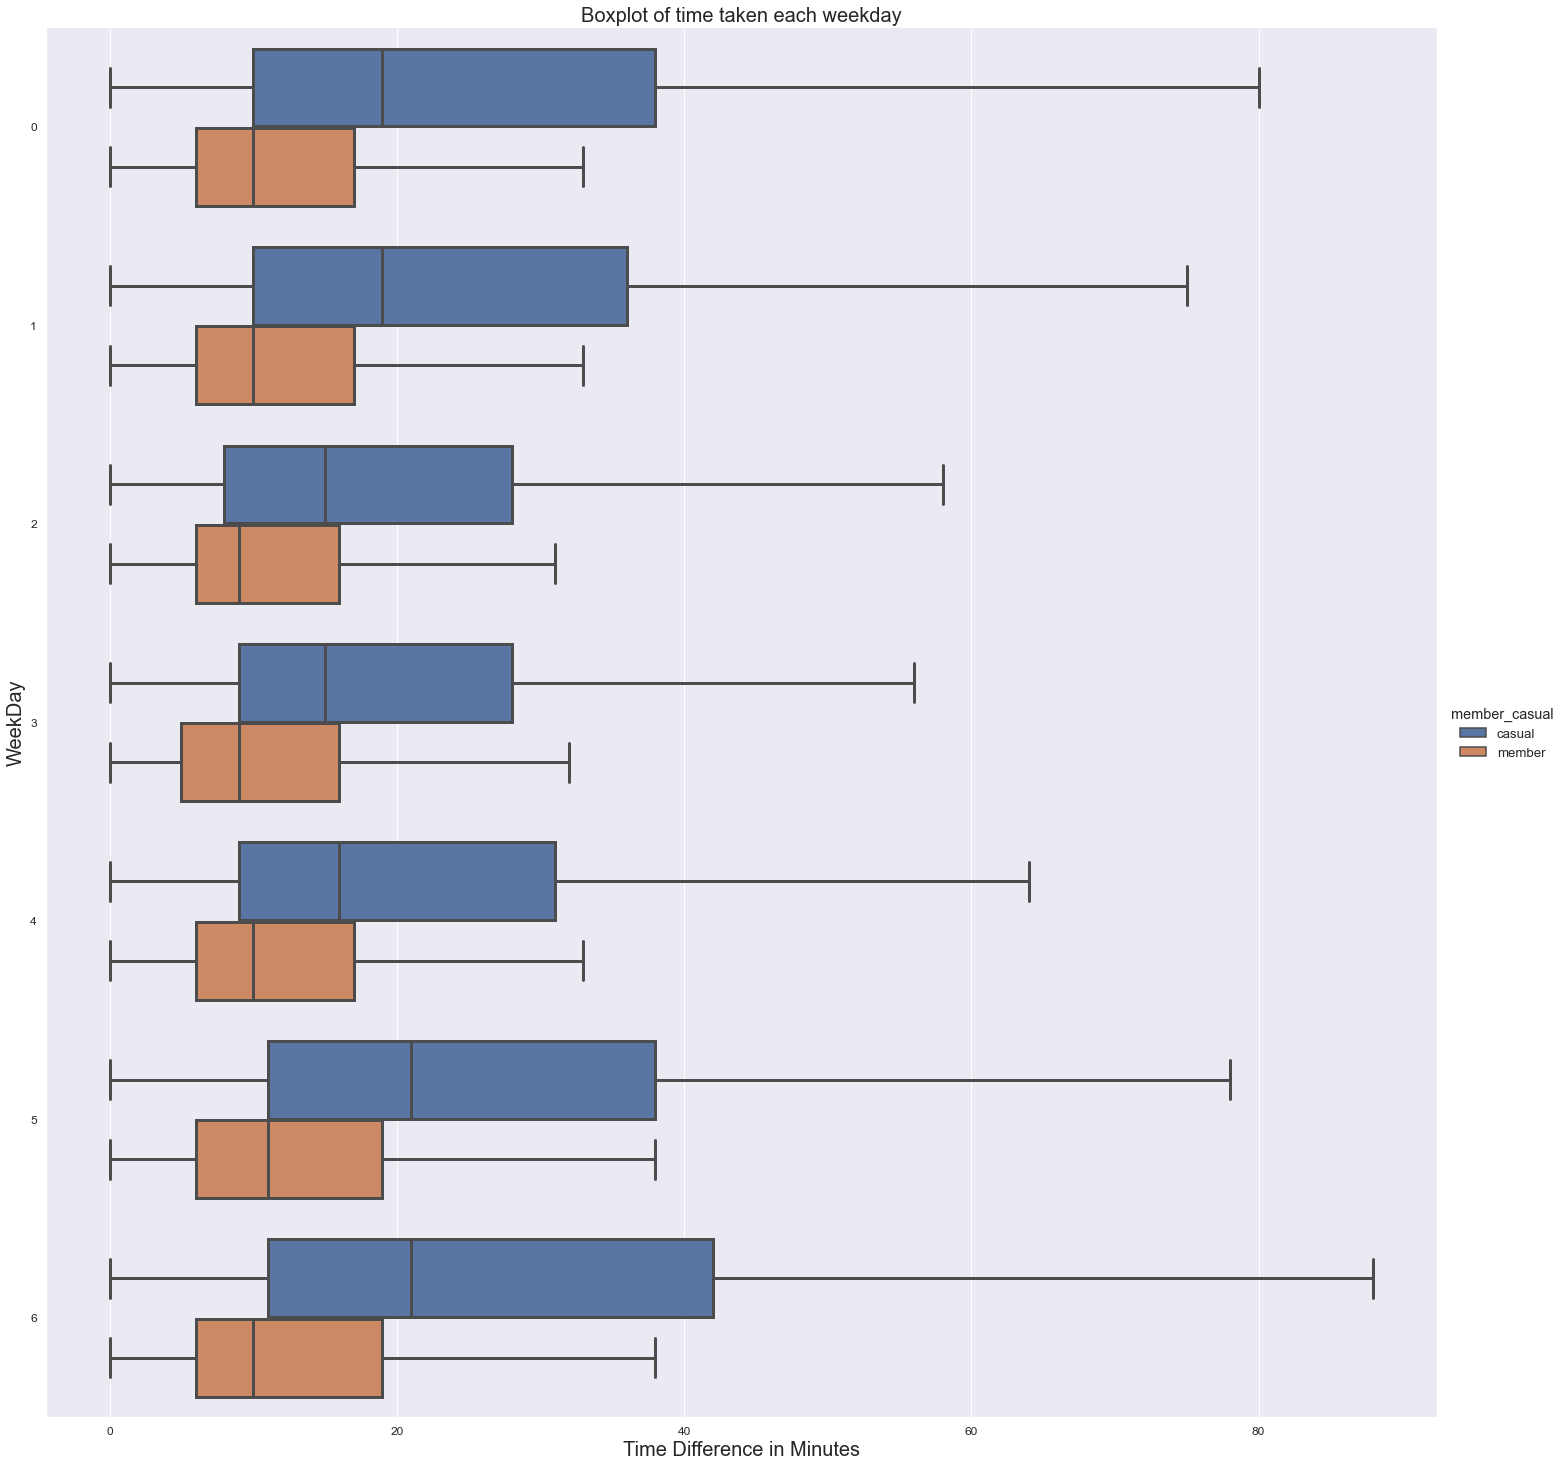

In [36]:
plt.figure(figsize=(20,20))

sns.catplot(x="time_diff", y="weekday",

                hue="member_casual", ci=None,

                data=df, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("Time Difference in Minutes", size=20)
plt.ylabel("WeekDay", size=20)

plt.title("Boxplot of time taken each weekday", size=20)

plt.show()

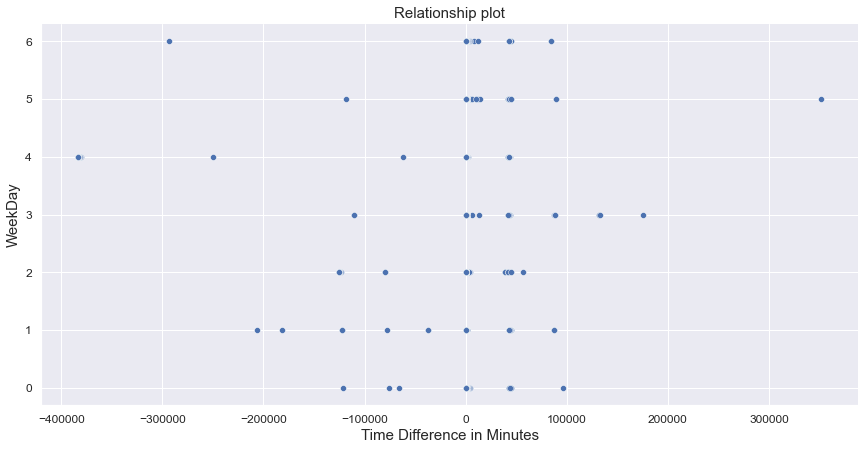

In [37]:
sns.relplot(x="time_diff", y="weekday", data=df, height = 6, aspect = 2)

plt.xlabel("Time Difference in Minutes", size=15)
plt.ylabel("WeekDay", size=15)
plt.title("Relationship plot", size=15)
plt.show()

### Time Series Analysis

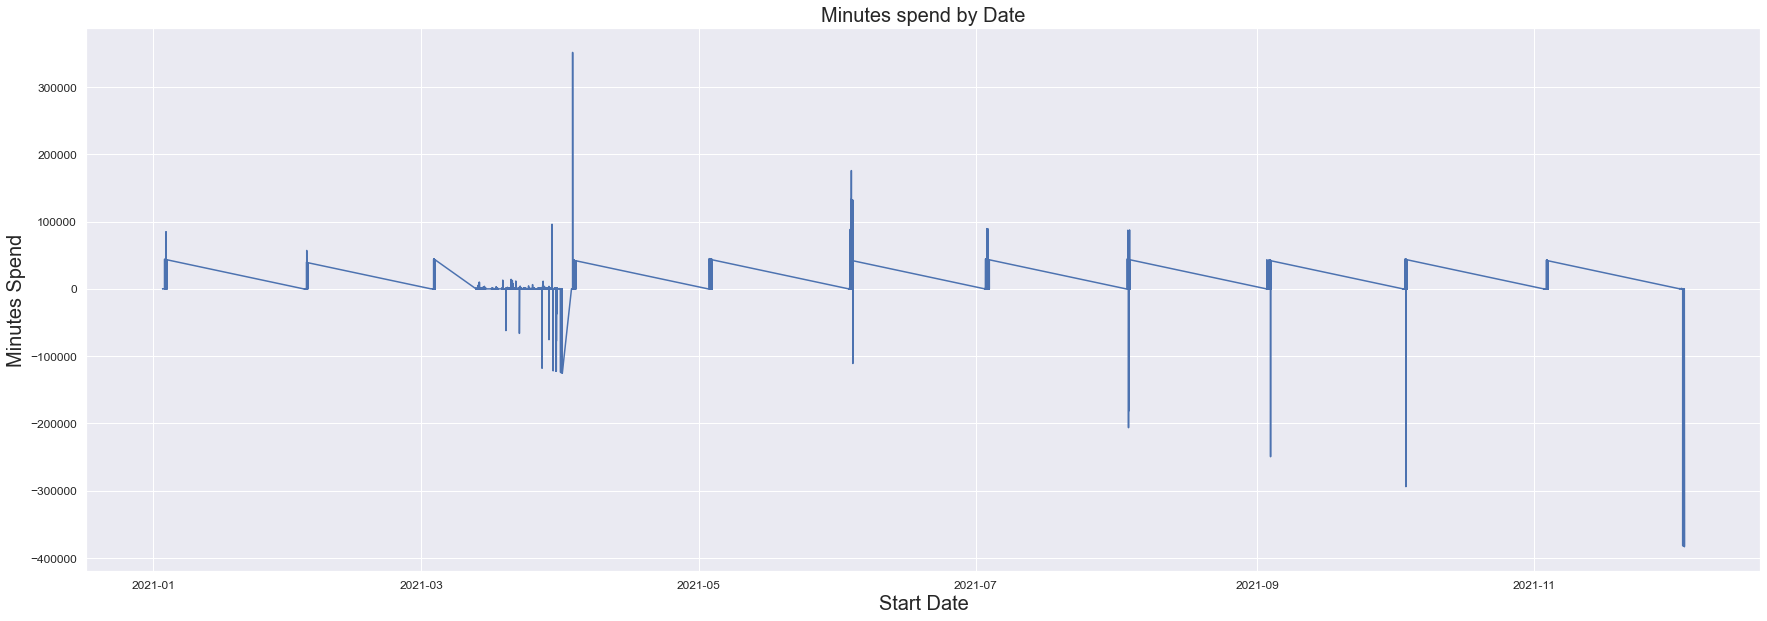

In [39]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.time_diff,data=df, estimator=None)
plt.title("Minutes spend by Date", fontsize=20)
plt.xlabel("Start Date", fontsize=20)
plt.ylabel("Minutes Spend", fontsize=20)
plt.show()

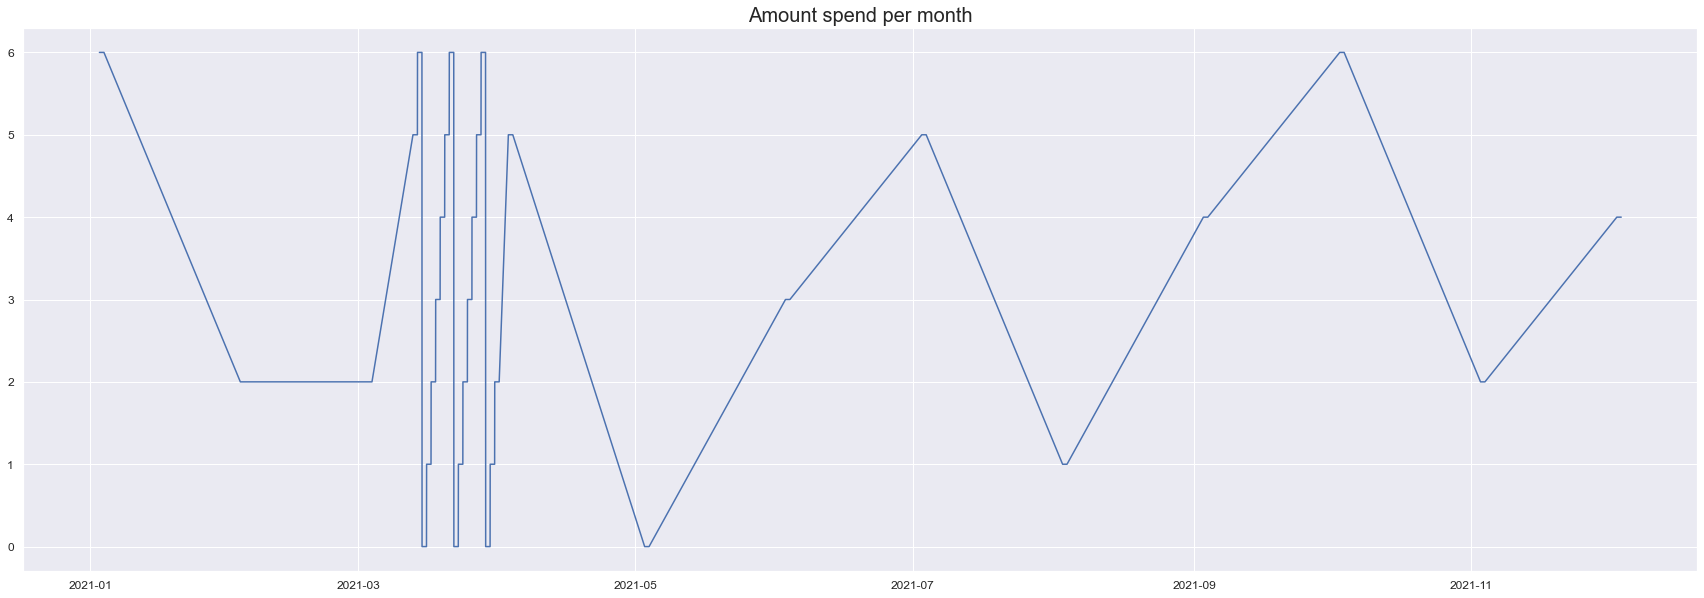

In [40]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.weekday, data=df, estimator=None)
plt.title("Amount spend per month", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

<Figure size 1440x1440 with 0 Axes>

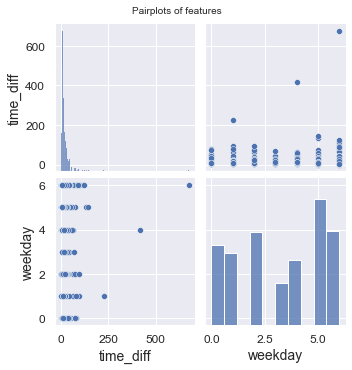

In [41]:
# Pairplots
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=10)
plt.show()

In [42]:
df.corr()

,time_diff,weekday
time_diff,1.00,-0.00
weekday,-0.00,1.00


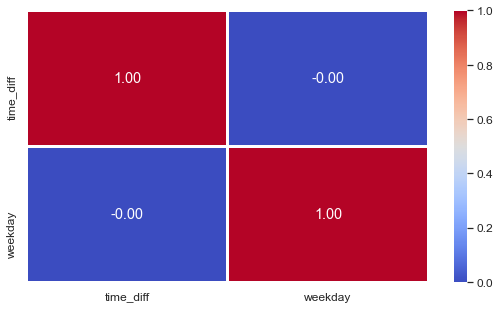

In [43]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

### Analysis
1. Casual riders spent more time in bikes.
2. Popular spot is Lake Shore Dr & Monroe St.
3. Classic bikes are most rented.
4. Docked bikes spent most time cycling.
5. Saturday has highest count of rented bikes.
6. Member riders love classic and electric bikes but casual riders prefer docked bikes.
7. Member riders have been in consistent usage for all days, same for casual riders.
8. Member riders spent less time biking than casual riders.
9. Majority of time spent riding whole one week is less than 5000 minutes or 83 hours.